In [58]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import cv2
from PIL import Image

In [60]:
DATA_DIR = '/home/sagar24/furniture/day3/data_comp/data_comp/train/'
SIZE = 64
dataset_train = []
label = []


In [61]:
bed = os.listdir(DATA_DIR + 'bed/')
for i, image_name in enumerate(bed):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(DATA_DIR + 'bed/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_train.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))
print(len(dataset_train))        

1110


In [62]:
chair = os.listdir(DATA_DIR + 'chair/')
for i, image_name in enumerate(chair):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(DATA_DIR + 'chair/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_train.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [63]:
sofa = os.listdir(DATA_DIR + 'sofa/')
for i, image_name in enumerate(sofa):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(DATA_DIR + 'sofa/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_train.append(np.array(image))
            label.append(2)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [64]:
swivelchair = os.listdir(DATA_DIR + 'swivelchair/')
for i, image_name in enumerate(swivelchair):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(DATA_DIR + 'swivelchair/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_train.append(np.array(image))
            label.append(3)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [65]:
table = os.listdir(DATA_DIR + 'table/')
for i, image_name in enumerate(table):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(DATA_DIR + 'table/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_train.append(np.array(image))
            label.append(4)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [66]:
DATA_DIR_test = '/home/sagar24/furniture/day3/data_comp/data_comp/test/'

dataset_test = []



In [67]:
test = os.listdir(DATA_DIR_test)
label2=[]
for i, image_name in enumerate(test):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            label2.append(image_name.split('.')[0])
            image = cv2.imread(DATA_DIR_test + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_test.append(np.array(image))
            
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))
print(len(dataset_test))

2164


6485
6485


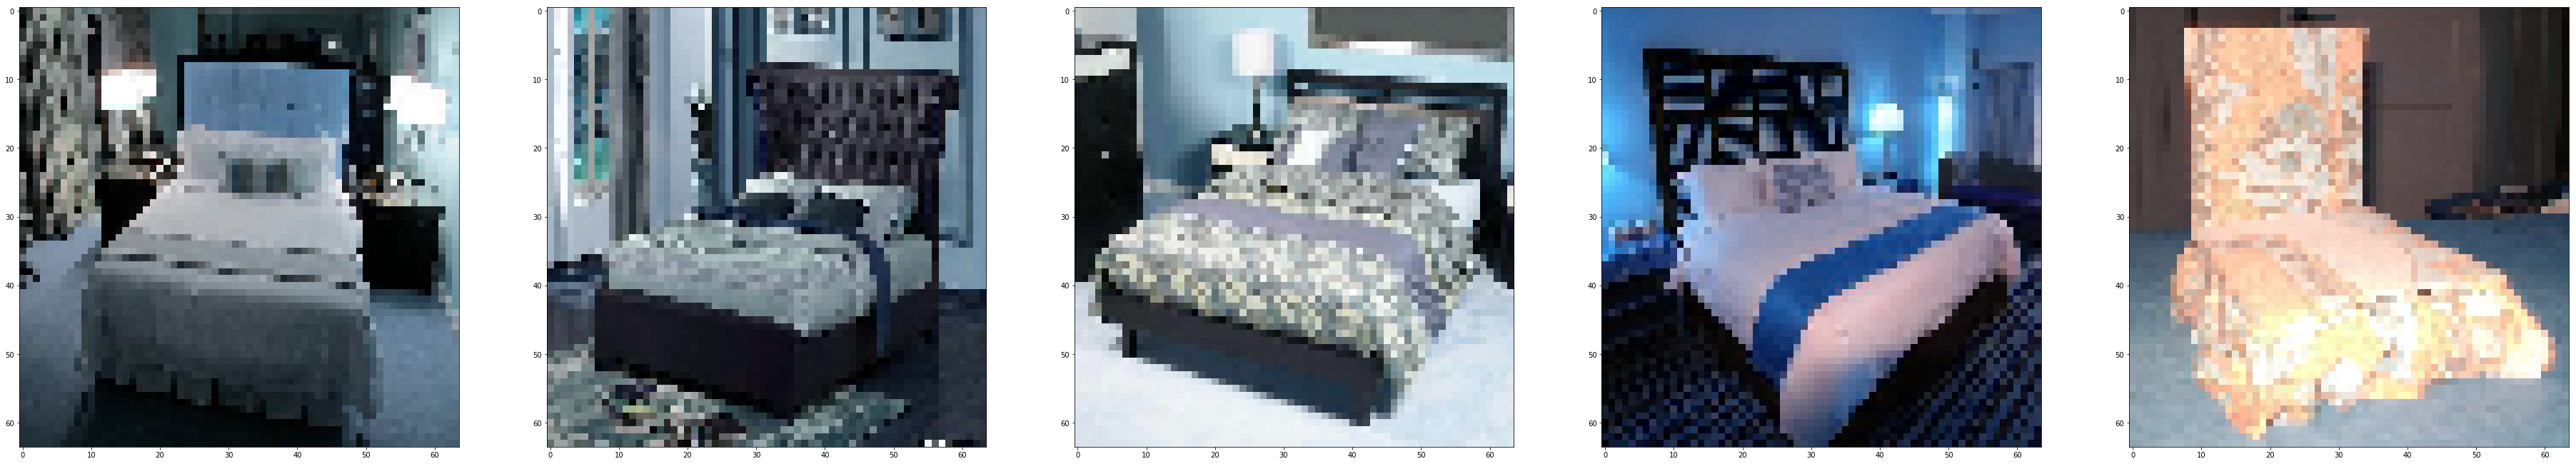

In [70]:
plt.figure(figsize = (64, 64))
for index, image_index in enumerate(np.random.randint(len(bed), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset_train[image_index])
print(len(dataset_train))
print(len(label))

2164


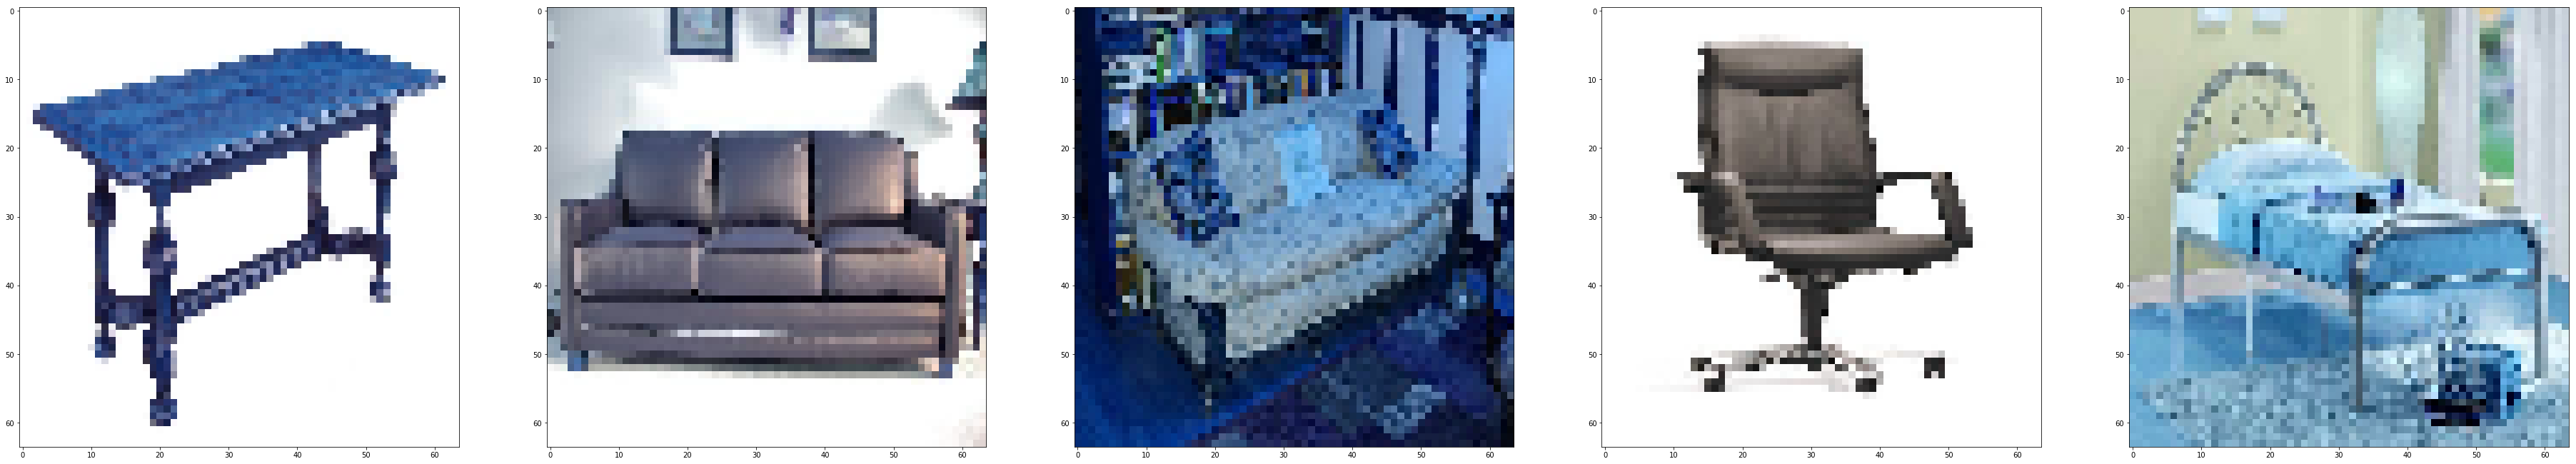

In [71]:
plt.figure(figsize = (64, 64))
for index, image_index in enumerate(np.random.randint(len(test), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset_test[image_index])
print(len(dataset_test))


In [72]:
from keras.utils import to_categorical

x_train=np.array(dataset_train)
y_train=to_categorical(np.array(label))
x_test=np.array(dataset_test)

import tensorflow as tf

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(x_train)

#x_train=x_train/255.0
#x_test=x_test/255.0

print(x_train.shape)
print(y_train[0])
print(y_train.shape)
print(x_test.shape)

(6485, 64, 64, 3)
[1. 0. 0. 0. 0.]
(6485, 5)
(2164, 64, 64, 3)


In [73]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)
print(x_train.shape)

train_generator = train_generator.flow(np.array(x_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)
print(len(train_generator))

(6485, 64, 64, 3)
102


In [74]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name for blocks
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Recieve Filters
    F1, F2, F3 = filters
    
    # another copy of input to add it back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
     # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut, X]) 
    X = Activation('relu')(X)
    
    
    
    return X

In [75]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s, s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut, X]) 
    X = Activation('relu')(X)
    
    
    
    return X

In [76]:
def ResNet50(input_shape = (64, 64, 3), classes = 5):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    
    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

        
    
    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    
    #print(X.shape) : (?,2,2,2048)
    
    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2, 2))(X)
    
    #print(X.shape) : (?,1,1,2048)

    # output layer
    X = Flatten()(X)
    
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    #print(X.shape) : (?,5)
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [77]:
model = ResNet50(input_shape = (64, 64, 3), classes = 5)

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64, shuffle=True)

Epoch 1/10
6485/6485 [==============================] - 352s 54ms/step - loss: 1.6547 - accuracy: 0.4782
Epoch 2/10
6485/6485 [==============================] - 346s 53ms/step - loss: 0.8085 - accuracy: 0.7379
Epoch 3/10
6485/6485 [==============================] - 346s 53ms/step - loss: 0.5145 - accuracy: 0.8384
Epoch 4/10
6485/6485 [==============================] - 346s 53ms/step - loss: 0.4788 - accuracy: 0.8571
Epoch 5/10
6485/6485 [==============================] - 346s 53ms/step - loss: 0.2673 - accuracy: 0.9110
Epoch 6/10
6485/6485 [==============================] - 346s 53ms/step - loss: 0.2991 - accuracy: 0.9101
Epoch 7/10
6485/6485 [==============================] - 345s 53ms/step - loss: 0.2359 - accuracy: 0.9163
Epoch 8/10
6485/6485 [==============================] - 345s 53ms/step - loss: 0.1347 - accuracy: 0.9544
Epoch 9/10
6485/6485 [==============================] - 365s 56ms/step - loss: 0.1227 - accuracy: 0.9582
Epoch 10/10
6485/6485 [==============================] 

In [80]:
y_pred=model.predict(x_test)
print(y_pred[0])

[9.9952543e-01 9.8190860e-05 2.3896257e-04 4.4448814e-05 9.2892122e-05]


In [81]:
y_pred1 = (np.argmax(y_pred, axis=1))
print(y_pred[1])
print(y_pred1)

[0.01348312 0.05546902 0.31320152 0.6156223  0.00222409]
[0 3 3 ... 0 1 4]


In [82]:

df = pd.DataFrame({"target" : y_pred1,"image" : label2})
df.to_csv("submission7.csv", index=False)

In [87]:
model.fit(model.fit(x_train, y_train, epochs = 1, batch_size = 64, shuffle=True))

Epoch 1/1
6485/6485 [==============================] - 345s 53ms/step - loss: 0.0774 - accuracy: 0.9733


AttributeError: 'History' object has no attribute 'ndim'

In [88]:
y_pred=model.predict(x_test)
print(y_pred[0])

[9.8914754e-01 3.6545969e-03 5.7128705e-03 2.8061264e-04 1.2044125e-03]


In [89]:
y_pred1 = (np.argmax(y_pred, axis=1))
print(y_pred[1])
print(y_pred1)

[0.01062633 0.0566354  0.7765079  0.15542923 0.00080114]
[0 2 3 ... 0 1 4]


In [90]:

df = pd.DataFrame({"target" : y_pred1,"image" : label2})
df.to_csv("submission8.csv", index=False)

In [28]:
model.fit(model.fit(x_train, y_train, epochs = 1, batch_size = 64, shuffle=True))

Epoch 1/1
6485/6485 [==============================] - 334s 52ms/step - loss: 0.0470 - accuracy: 0.9852


AttributeError: 'History' object has no attribute 'ndim'

In [33]:
model.fit(model.fit(x_train, y_train, epochs = 2, batch_size = 64, shuffle=True))

Epoch 1/2
6485/6485 [==============================] - 335s 52ms/step - loss: 0.0628 - accuracy: 0.9796
Epoch 2/2
6485/6485 [==============================] - 357s 55ms/step - loss: 0.0681 - accuracy: 0.9823


AttributeError: 'History' object has no attribute 'ndim'

In [34]:
y_pred=model.predict(x_test)
print(y_pred[0])

[9.9992466e-01 1.2427787e-06 7.1993221e-05 2.0845443e-06 6.5100124e-08]


In [36]:
i=0
df = pd.DataFrame({"target" : y_pred1,"image" : label2})
df.to_csv("submission6.csv", index=False)

In [201]:
tag=[]
for i in range(2164):
    a=str(i)
    tag.append('img'+a)
tag=np.array(tag)   
#tag=tag.reshape(-1,1)
#print(tag.shape)

In [202]:
i=0
df = pd.DataFrame({"target" : y_pred1,"image" : tag})
df.to_csv("submission1.csv", index=False)

4328


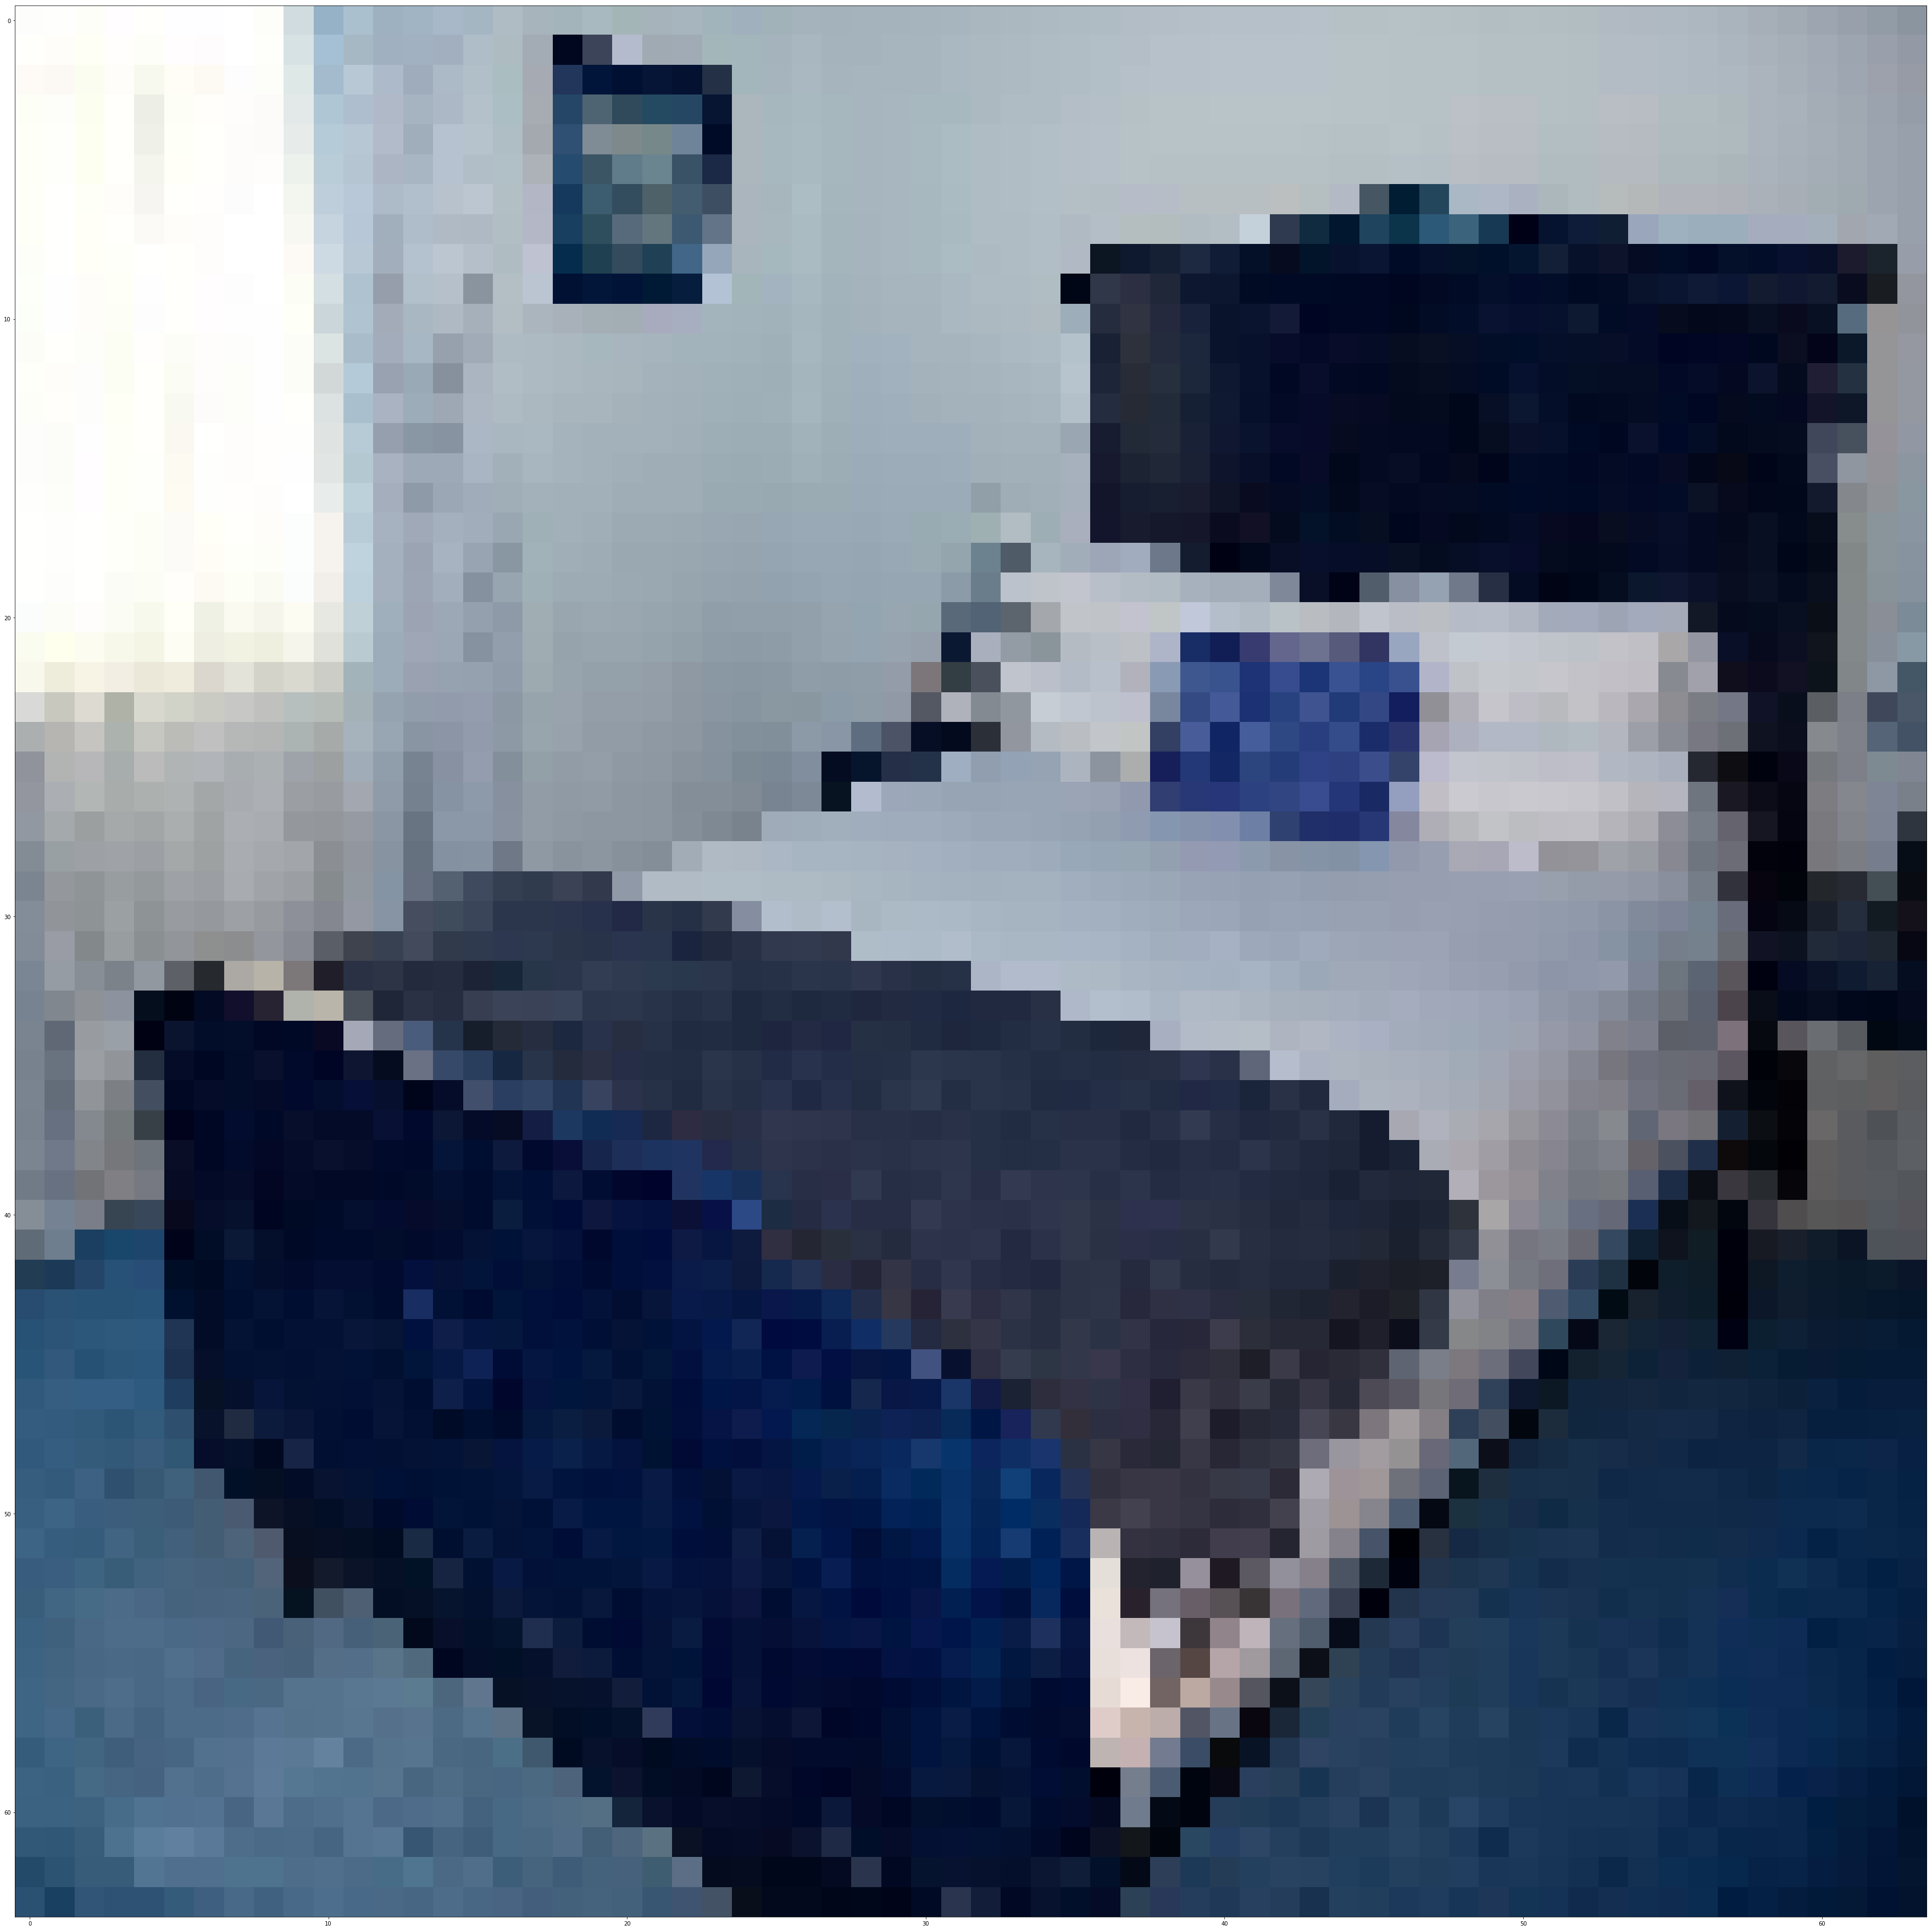

In [213]:
plt.figure(figsize = (64, 64))
plt.imshow(dataset_test[5])
print(len(dataset_test))


In [217]:
test = os.listdir(DATA_DIR_test)
dataset_test2=[]
label2=[]
for i, image_name in enumerate(test):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            label2.append(image_name.split('.')[0])
            image = cv2.imread(DATA_DIR_test + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset_test2.append(np.array(image))
            
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))
print(len(dataset_test2))

2164


img1639


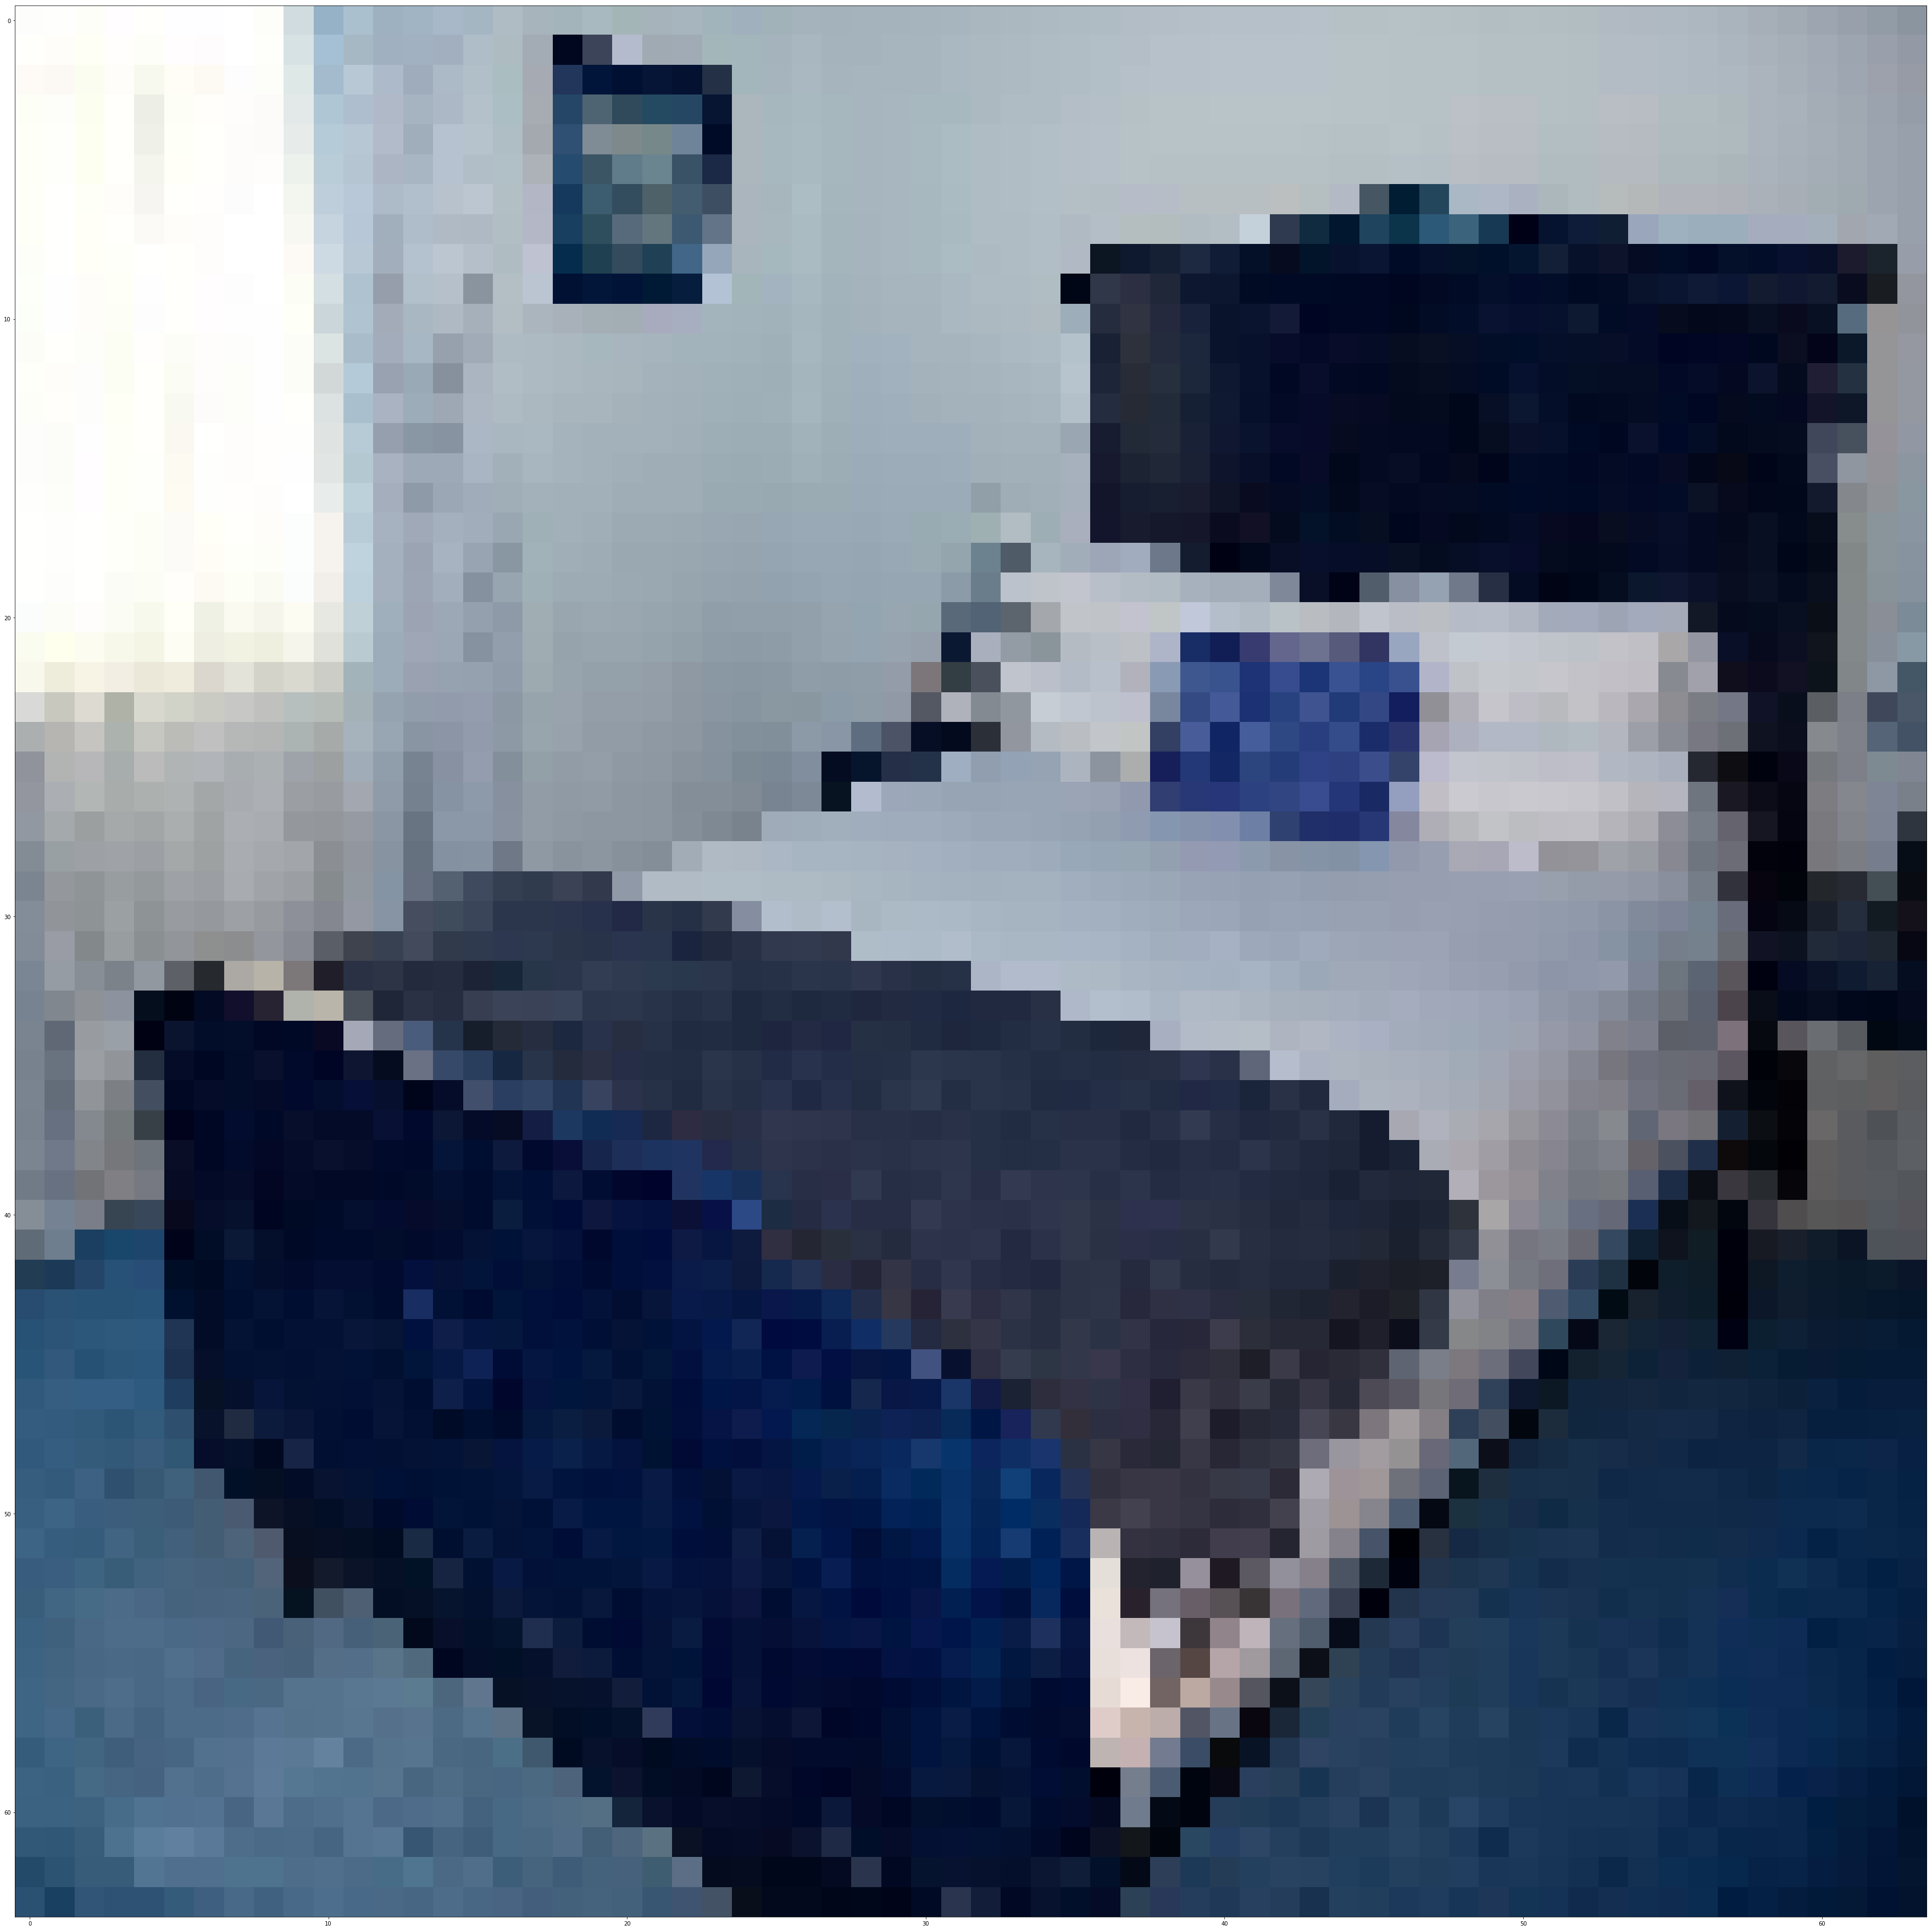

In [219]:
plt.figure(figsize = (64, 64))
plt.imshow(dataset_test2[5])
print(label2[5])


In [221]:
print(y_pred1[5])

0
